In [1]:
# Importing necessary libraries
import pandas as pd

# Reading the CSV file
file_path = "master_final.csv"
data = pd.read_csv(file_path)

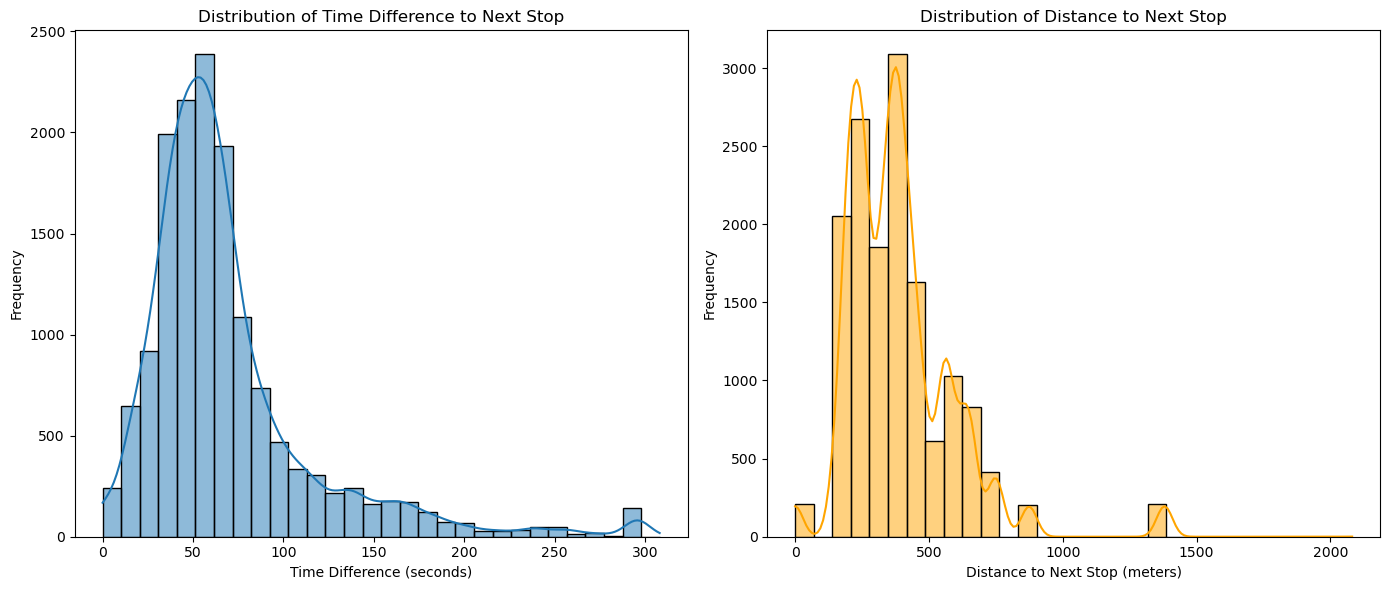

count    14812.000000
mean       389.969282
std        201.591016
min          0.000000
25%        249.000000
50%        363.000000
75%        466.000000
max       2081.000000
Name: dist_to_next_stop, dtype: float64

In [2]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot size
plt.figure(figsize=(14, 6))

# Plotting histogram for time_diff
plt.subplot(1, 2, 1)
sns.histplot(data['time_diff'], bins=30, kde=True)
plt.title('Distribution of Time Difference to Next Stop')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')

# Plotting histogram for dist_to_next_stop
plt.subplot(1, 2, 2)
sns.histplot(data['dist_to_next_stop'], bins=30, kde=True, color='orange')
plt.title('Distribution of Distance to Next Stop')
plt.xlabel('Distance to Next Stop (meters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics for time_diff
timediff_summary = data['time_diff'].describe()
timediff_summary

# Summary statistics for dist
dist_summary = data['dist_to_next_stop'].describe()
dist_summary

In [3]:
timediff_summary

count    14812.000000
mean        69.148056
std         47.954879
min          0.000000
25%         41.000000
50%         58.000000
75%         80.000000
max        308.000000
Name: time_diff, dtype: float64

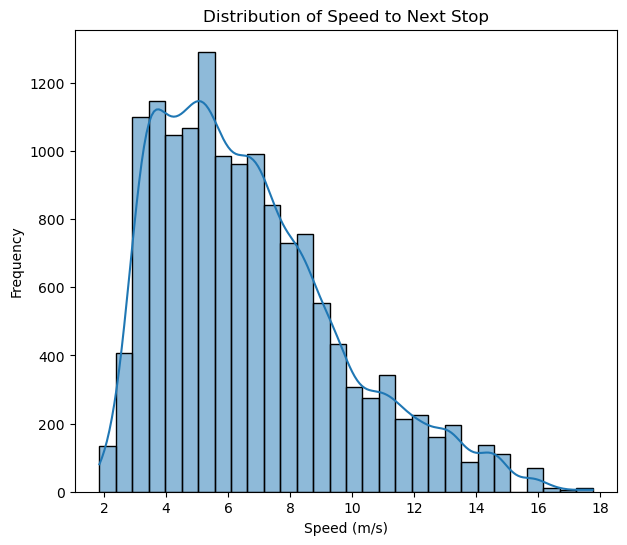

count    14604.000000
mean         6.695606
std          2.932769
min          1.848485
25%          4.410596
50%          6.150538
75%          8.344828
max         17.750000
Name: speed_m_s, dtype: float64

In [3]:
# Calculating the speed in m/s
data['speed_m_s'] = data['dist_to_next_stop'] / data['time_diff']

# Plotting histogram for speed
plt.figure(figsize=(7, 6))
sns.histplot(data['speed_m_s'], bins=30, kde=True)
plt.title('Distribution of Speed to Next Stop')
plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for speed
speed_summary = data['speed_m_s'].describe()
speed_summary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


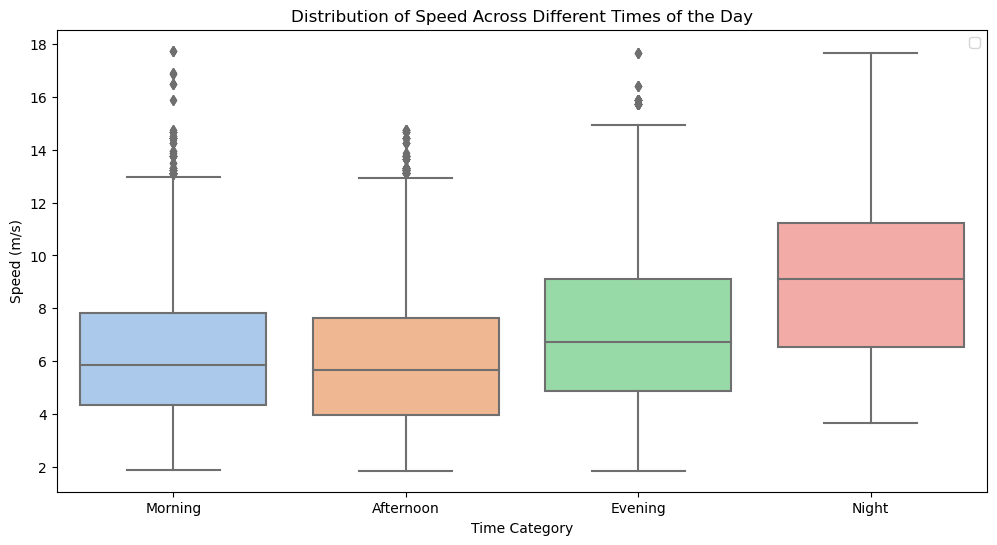

In [5]:
# Setting up the plot size
plt.figure(figsize=(12, 6))

# Plotting boxplot for speed across different time categories
sns.boxplot(x='time_category', y='speed_m_s', data=data, palette='pastel')
plt.title('Distribution of Speed Across Different Times of the Day')
plt.xlabel('Time Category')
plt.ylabel('Speed (m/s)')

plt.show()

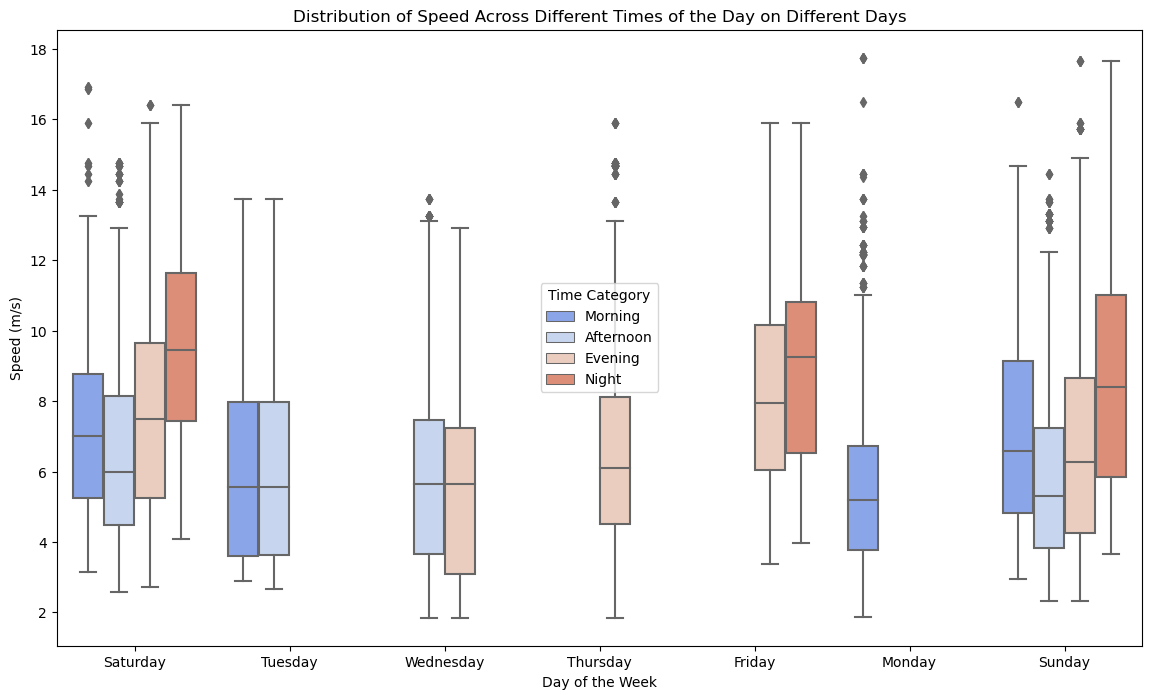

In [12]:
# Setting up the plot size
plt.figure(figsize=(14, 8))

# Plotting boxplot for speed across different times of the day on different days of the week
sns.boxplot(x='day_of_the_week', y='speed_m_s', hue='time_category', data=data, palette='coolwarm')
plt.title('Distribution of Speed Across Different Times of the Day on Different Days')
plt.xlabel('Day of the Week')
plt.ylabel('Speed (m/s)')
plt.legend(title='Time Category')

plt.show()

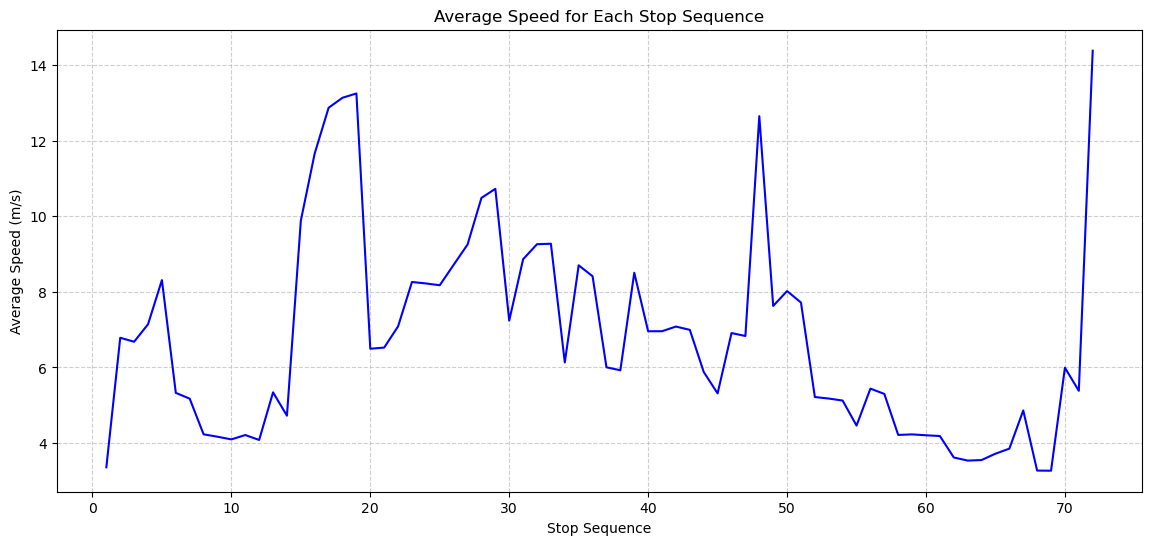

In [13]:
# Grouping data by stop_sequence and calculating the mean speed for each group
average_speed_per_stop_sequence = data.groupby('stop_sequence')['speed_m_s'].mean().reset_index()

# Plotting line plot for average speed across different stop sequences
plt.figure(figsize=(14, 6))
sns.lineplot(x='stop_sequence', y='speed_m_s', data=average_speed_per_stop_sequence, color='blue')
plt.title('Average Speed for Each Stop Sequence')
plt.xlabel('Stop Sequence')
plt.ylabel('Average Speed (m/s)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

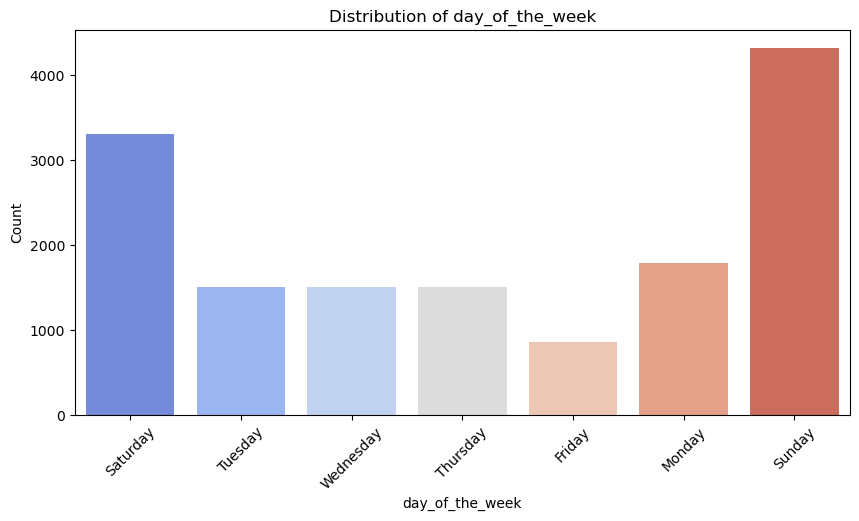

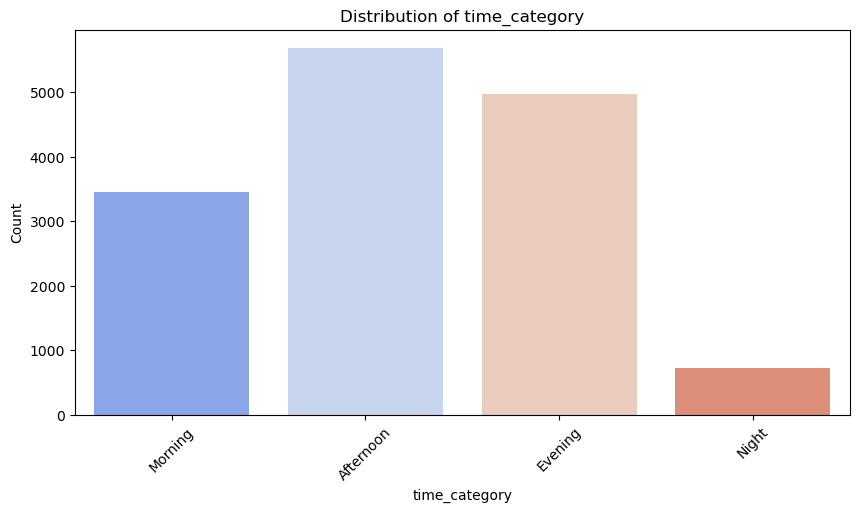

In [17]:
# Plotting distributions of categorical features
categorical_features = ['day_of_the_week', 'time_category']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data, palette='coolwarm')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()